In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import copy as cp

from rayopt import *
from rayopt import zemax

np.set_printoptions(precision=3)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
d = requests.get("http://www.lens-designs.com/MicroscopeObjectives/US07502177-1.zmx")  #  SSLError if it's unable to verify the certificate:
d.encoding = "utf-16"

In [11]:
d.status_code # 200 is OK

200

In [15]:
# d.text

/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/elements.py:134: RuntimeWarning: invalid value encountered in multiply
  self._offset = d*u
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:186: RuntimeWarning: divide by zero encountered in true_divide
  return self.n[(0, -2), ]/(2*na)
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:191: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/elements.py:497: RuntimeWarning: invalid value encountered in sqrt
  g = np.sqrt(np.square(d) - e*f)


material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
OBSC not handled 0 3.0 0
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
OBSC not handled 0 3.0 0
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
material not found SUPRASIL __init__() got an unexpected keyword argument 'vd'
ma

ValueError: ('no viable interval found', 0.0, 9.313225746154785e-10, nan)

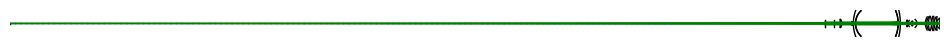

In [13]:
s = zemax.zmx_to_system(d.text)
s.object = InfiniteConjugate(angle=np.deg2rad(3.5/2), pupil={"radius": 7})
s.wavelengths = 193e-9, 194e-9, 192e-9
s.fields = 0, .7, 1.
s.stop = 1
del s[0]
s[0].radius = s[1].radius
s[1].distance = 20.
fsm = cp.copy(s[2].material)
fsm.mirror = True
for e in s[10:13]:
    e.curvature *= -1
for e in s:
    if getattr(e.material, "mirror", None):
        e.material = fsm
s.update()
a = Analysis(s)

In [14]:
print(system_to_yaml(s))

description: ''
elements:
- {material: basic/air, radius: 7.101937623607}
- {distance: 20.0, material: basic/air, radius: 7.101937623607}
- {curvature: -0.012250712097142069, distance: 15.188841, material: basic/air, radius: 9.0}
- {curvature: -0.05543026775313687, distance: 3.5, material: basic/air, radius: 9.0}
- {curvature: 0.05334878314093095, distance: 22.449116, material: basic/air, radius: 4.0}
- {curvature: 0.0012576439726421588, distance: 2.0, material: basic/air, radius: 4.0}
- {curvature: 0.011765167907417353, distance: 1.998104, material: basic/air, radius: 3.0}
- {curvature: 0.024812404574593556, distance: 5.0, material: basic/air, radius: 3.0}
- {curvature: -0.012727913010722148, distance: 97.532362, material: basic/air, radius: 29.0}
- {curvature: -0.00756944706536549, distance: 5.0, material: basic/air, radius: 31.0}
- curvature: 0.012727913010722148
  direction: [-0.0, -0.0, -1.0]
  distance: 5.0
  material: basic/air
  radius: 29.0
- curvature: -0.024812404574593556
 